# 特征脸

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people()

In [19]:
lfw_people.target.shape

(13233,)

In [20]:
list(lfw_people.target[:10])

[5360, 3434, 3807, 26, 3957, 439, 2683, 3734, 5465, 3445]

In [21]:
lfw_people.images.shape

(13233, 62, 47)

In [22]:
lfw_people.data.shape

(13233, 2914)

In [23]:
random_indexes = np.random.permutation(len(lfw_people.data))
X = lfw_people.data[random_indexes]

In [24]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

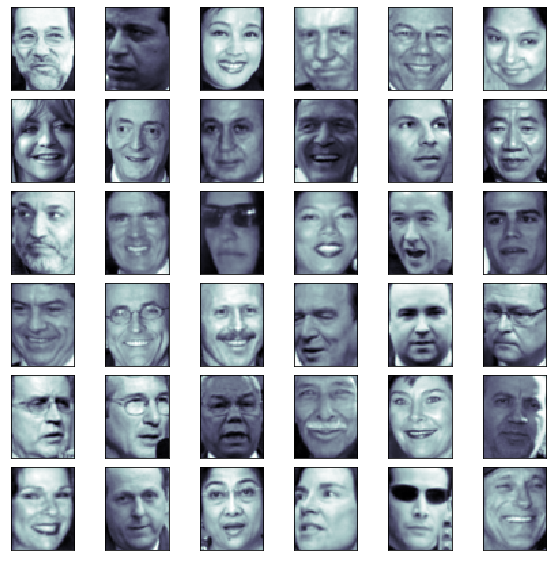

In [25]:
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap='bone')

    plt.show()

plot_faces(example_faces)

## 特征脸

In [26]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 19.8 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
pca.components_.shape

(2914, 2914)

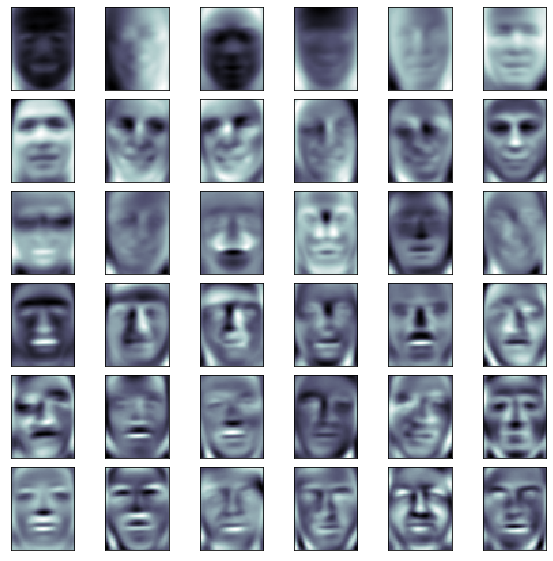

In [28]:
plot_faces(pca.components_[:36])

In [29]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.data.shape

(1348, 2914)

In [30]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

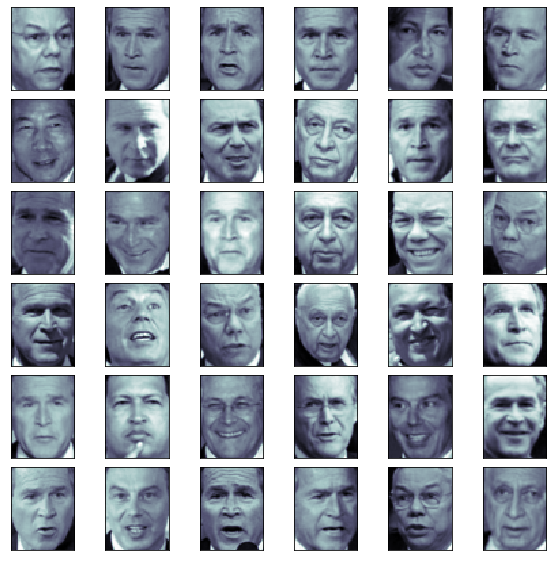

In [31]:
plot_faces(faces.data)